In [1]:
import pandas as pd
import numpy as np
import re

import wordcloud
import matplotlib.pyplot as plt

In [2]:
l_2015 = pd.read_csv('lyrics_2015.csv')
l_2015['Lyrics'] = l_2015['Lyrics'].str.replace(',', '').str.replace('.', '').str.lower()

In [3]:
l_2015['words_splited'] = [re.findall(r"\w+", string) for string in l_2015['Lyrics']]

## FISH WORDS

In [4]:
def bunda(df_col):
    result = [re.findall(r'\bbund\w+', word) for word in df_col]
    return result

def rebolar(df_col):
    result = [re.findall(r'\brebol\w+', word) for word in df_col]
    return result

print(bunda(l_2015['Lyrics']))
print(rebolar(l_2015['Lyrics']))

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


## Create columns

In [5]:
#I want to substitute words that vary from bunda
#bunda, bundão, bundinha
l_2015['list_bunda'] = bunda(l_2015['Lyrics'])
#rebolo, rebola, rebolando, rebolar
l_2015['list_rebolar'] = rebolar(l_2015['Lyrics'])

#others
l_2015['list_bumbum'] = [re.findall('bumbum', word) for word in l_2015['Lyrics']]
l_2015['list_cama'] = [re.findall('cama', word) for word in l_2015['Lyrics']]
l_2015['list_colchao'] = [re.findall('colchão', word) for word in l_2015['Lyrics']]

l_2015.head(50)

,Song,Singer,Lyrics,words_splited,list_bunda,list_rebolar,list_bumbum,list_cama,list_colchao
0,Escreve Aí,Luan Santana,te falo tanta coisa enquanto tento segurar a l...,"[te, falo, tanta, coisa, enquanto, tento, segu...",[],[],[],[],[]
1,Sapequinha,Eduardo Costa,pensa num trem bom que trem gostoso hoje não t...,"[pensa, num, trem, bom, que, trem, gostoso, ho...",[],[],[],[],[]
2,Seu Bombeiro,Munhoz e Mariano,eu sou seu bom seu bom seu bom seu bom bombeir...,"[eu, sou, seu, bom, seu, bom, seu, bom, seu, b...",[],[],[],[],[]
3,Quando Deus Quer,Lucas Lucco,de chapinha na chuva ou de pijama feio amarelo...,"[de, chapinha, na, chuva, ou, de, pijama, feio...",[],[],[],[],[]
4,Barraqueira,Alexandre Pires,inventar desculpinha com ela não rola e se eu ...,"[inventar, desculpinha, com, ela, não, rola, e...",[],[],[],[],[]
5,Deixa ele sofrer,Anitta,deixa ele chorar deixa ele chorar deixa ele so...,"[deixa, ele, chorar, deixa, ele, chorar, deixa...",[],[],[],[],[]
6,Eu Ligo Pra Você,Zé Neto e Cristiano,desse jeito que eu ando eu não sei se aguento ...,"[desse, jeito, que, eu, ando, eu, não, sei, se...",[],[],[],[],[]
7,"Hey, Mundo!",Thiaguinho,ah muleke! se quiser me acompanhar vem mas vem...,"[ah, muleke, se, quiser, me, acompanhar, vem, ...",[],[],[],[],[]
8,Coração cansou,Michel Teló,não vou mais te procurar nem sequer você vai o...,"[não, vou, mais, te, procurar, nem, sequer, vo...",[],[],[],[],[]
9,Eu Quero É Rolo,Bruno e Barretto,tava sofrendo demais bebendo demais cara amass...,"[tava, sofrendo, demais, bebendo, demais, cara...",[],[],[],[],[]


In [6]:
#Total
l_2015['Total_words'] = l_2015['Lyrics'].str.len()
#Words of interest
l_2015['count_bunda'] = l_2015['Lyrics'].str.count(r'\bbund\w+')
l_2015['count_rebolar'] = l_2015['Lyrics'].str.count(r'\brebol\w+')
l_2015['count_bumbum'] = l_2015['Lyrics'].str.count('bumbum')
l_2015['count_colchão'] = l_2015['Lyrics'].str.count('colchão')
l_2015['count_cama'] = l_2015['Lyrics'].str.count('cama')

l_2015['Total_sexual_words']  = l_2015[['count_bunda','count_rebolar','count_bumbum','count_colchão','count_cama']].sum(axis = 1)
l_2015.head(5)



,Song,Singer,Lyrics,words_splited,list_bunda,list_rebolar,list_bumbum,list_cama,list_colchao,Total_words,count_bunda,count_rebolar,count_bumbum,count_colchão,count_cama,Total_sexual_words
0,Escreve Aí,Luan Santana,te falo tanta coisa enquanto tento segurar a l...,"[te, falo, tanta, coisa, enquanto, tento, segu...",[],[],[],[],[],1490,0,0,0,0,0,0
1,Sapequinha,Eduardo Costa,pensa num trem bom que trem gostoso hoje não t...,"[pensa, num, trem, bom, que, trem, gostoso, ho...",[],[],[],[],[],885,0,0,0,0,0,0
2,Seu Bombeiro,Munhoz e Mariano,eu sou seu bom seu bom seu bom seu bom bombeir...,"[eu, sou, seu, bom, seu, bom, seu, bom, seu, b...",[],[],[],[],[],647,0,0,0,0,0,0
3,Quando Deus Quer,Lucas Lucco,de chapinha na chuva ou de pijama feio amarelo...,"[de, chapinha, na, chuva, ou, de, pijama, feio...",[],[],[],[],[],541,0,0,0,0,0,0
4,Barraqueira,Alexandre Pires,inventar desculpinha com ela não rola e se eu ...,"[inventar, desculpinha, com, ela, não, rola, e...",[],[],[],[],[],1361,0,0,0,0,0,0


In [7]:
l_2015.to_csv('count_2015.csv',index=False)

## Check ratio

In [8]:
total_sexual_words = l_2015['Total_sexual_words'].sum(axis = 0)
print(total_sexual_words)
total_words = l_2015['Total_words'].sum(axis = 0)
print(total_words)

2
23008


In [9]:
stop = 'ta tá cê ai vai ver volto tô vou pra quero quanto mim deu assim de \na \no \nque \ne \ndo \nda \nem \num \npara \né \ncom \nnão \numa \nos \nno \nse \nna \npor \nmais \nas \ndos \ncomo \nmas \nfoi \nao \nele \ndas \ntem \nà \nseu \nsua \nou \nser \nquando \nmuito \nhá \nnos \njá \nestá \neu \ntambém \nsó \npelo \npela \naté \nisso \nela \nentre \nera \ndepois \nsem \nmesmo \naos \nter \nseus \nquem \nnas \nme \nesse \neles \nestão \nvocê \ntinha \nforam \nessa \nnum \nnem \nsuas \nmeu \nàs \nminha \ntêm \nnuma \npelos \nelas \nhavia \nseja \nqual \nserá \nnós \ntenho \nlhe \ndeles \nessas \nesses \npelas \neste \nfosse \ndele \ntu \nte \nvocês \nvos \nlhes \nmeus \nminhas\nteu \ntua\nteus\ntuas\nnosso \nnossa\nnossos\nnossas\ndela \ndelas \nesta \nestes \nestas \naquele \naquela \naqueles \naquelas \nisto \naquilo \nestou\nestá\nestamos\nestão\nestive\nesteve\nestivemos\nestiveram\nestava\nestávamos\nestavam\nestivera\nestivéramos\nesteja\nestejamos\nestejam\nestivesse\nestivéssemos\nestivessem\nestiver\nestivermos\nestiverem\nhei\nhá\nhavemos\nhão\nhouve\nhouvemos\nhouveram\nhouvera\nhouvéramos\nhaja\nhajamos\nhajam\nhouvesse\nhouvéssemos\nhouvessem\nhouver\nhouvermos\nhouverem\nhouverei\nhouverá\nhouveremos\nhouverão\nhouveria\nhouveríamos\nhouveriam\nsou\nsomos\nsão\nera\néramos\neram\nfui\nfoi\nfomos\nforam\nfora\nfôramos\nseja\nsejamos\nsejam\nfosse\nfôssemos\nfossem\nfor\nformos\nforem\nserei\nserá\nseremos\nserão\nseria\nseríamos\nseriam\ntenho\ntem\ntemos\ntém\ntinha\ntínhamos\ntinham\ntive\nteve\ntivemos\ntiveram\ntivera\ntivéramos\ntenha\ntenhamos\ntenham\ntivesse\ntivéssemos\ntivessem\ntiver\ntivermos\ntiverem\nterei\nterá\nteremos\nterão\nteria\nteríamos\nteriam'
stop = stop.replace('\n',' ').strip()
stoplist = re.sub("[^\w]", " ",  stop).split()
stoplist

filtered_words = [word for lst in l_2015['words_splited'] for word in lst if word not in stoplist]
#clean_lyrics = ' '.join(filtered_words)
print (len(filtered_words))

ratio_2015 = total_sexual_words / len(filtered_words)
ratio_2015

2195


0.0009111617312072893

## wordclowd

In [10]:
l_2015[['count_bunda','count_rebolar','count_bumbum','count_colchão','count_cama']].sum(axis = 0)

count_bunda      0
count_rebolar    0
count_bumbum     0
count_colchão    0
count_cama       2
dtype: int64

In [11]:
#print(filtered_words)
bag_all = " ".join(filtered_words)
bag_all

'falo tanta coisa enquanto tento segurar lágrima insiste cair entro carro abro vidro antes ir embora digo olha aqui ainda esquecer escreve aí chego casa dou cara foto ducha vinho acalmar penso partir outra logo tentando enganar tentando enganar fazer fazer amo falo cara tirar sobra nada sorriso desmonta inteiro simples estalar dedos talvez deixado ir gosto aqui fraco demais continuar juntando forças poder falar sorrir fazer chego casa dou cara foto ducha vinho acalmar penso partir outra logo tentando enganar tentando enganar fazer fazer amo falo cara tirar sobra nada sorriso desmonta inteiro simples estalar dedos talvez deixado ir gosto aqui fraco demais continuar juntando forças poder falar sorrir fazer fazer pensa trem bom trem gostoso hoje choro migué sapequinha cair lagoa hoje jacaré pensa trem doido gostoso hoje choro migué sapequinha cair lagoa hoje jacaré dou mole dou mole caipira pressão dou mole jogo braços grudo peito feito regaço ô ô ô ô ô ô vamos brincar besteirinha brincar

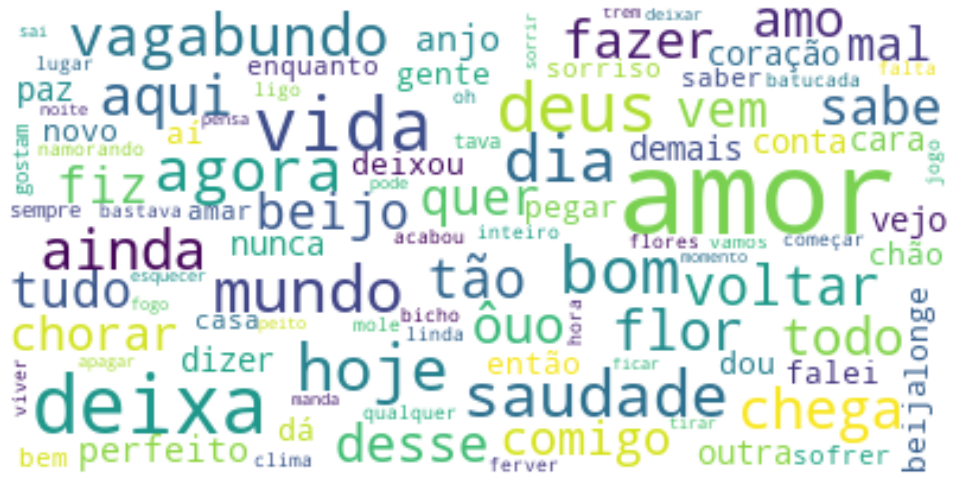

In [13]:
import wordcloud

wordcloud = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white", collocations=False).generate(bag_all)
plt.figure(figsize=[17,17])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
#plt.show()

#plt.savefig("words_15.png", dpi = 400)

## draft 

In [ ]:
sexual_columns = ['list_bunda','list_bumbum','list_rebolar','list_cama', 'list_colchao']
sexual_cloud = []
for name in sexual_columns:
    for lst in  l_2015[name]:
        if len(lst) > 0:
            sexual_cloud.append(lst)
        
sexual_cloud = [i for lst in sexual_cloud for i in lst ]
bag_sexual = " ".join(sexual_cloud)
bag_sexual